In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Varying D

In [2]:
res = pd.read_csv("resFIX_R_2.csv")
res["R/D"] = res["R"]/res["D"]
res["error"] = abs(res["Analytic"] - res["Numerical"])
res["error%"] = res["error"]/res["Analytic"] * 100
res["D/R"] = 1/res["R/D"]

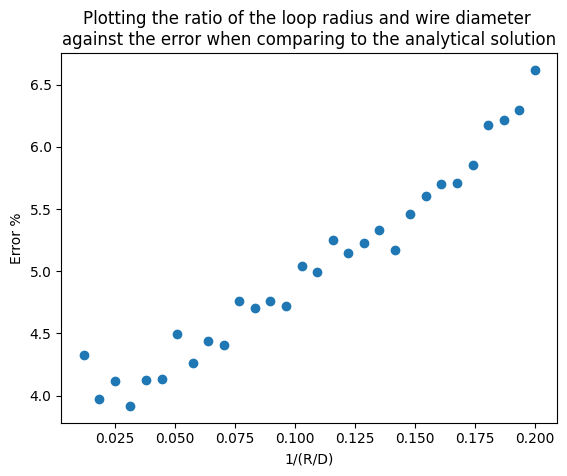

In [3]:
plt.scatter(res["D/R"],res["error%"])
plt.ylabel("Error %")
plt.xlabel("1/(R/D)")
plt.title("Plotting the ratio of the loop radius and wire diameter \nagainst the error when comparing to the analytical solution")
plt.show()

## Varying R

In [4]:
res = pd.read_csv("resFIX_D.csv")
res["R/D"] = res["R"]/res["D"]
res["error"] = abs(res["Analytic"] - res["Numerical"])
res["error%"] = res["error"]/res["Analytic"] * 100
# res

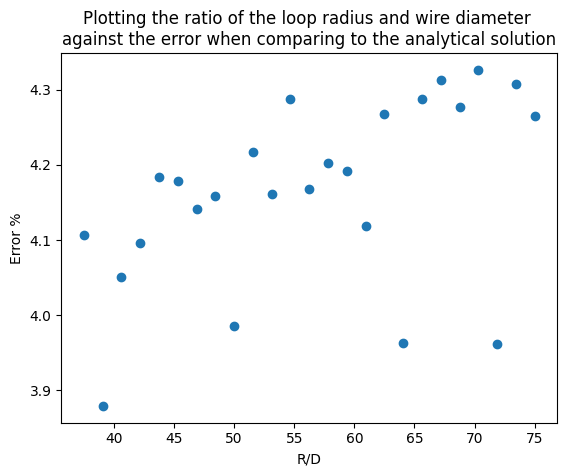

In [5]:
plt.scatter(res["R/D"],res["error%"])
plt.ylabel("Error %")
plt.xlabel("R/D")
plt.title("Plotting the ratio of the loop radius and wire diameter \nagainst the error when comparing to the analytical solution")
plt.show()

## Surface area mesh error 

In [6]:
res = pd.read_csv("resFIX_D_AreaErr.csv")
res["R/D"] = res["R"]/res["D"]
res["error"] = abs(res["Analytic"] - res["Numerical"])
res["error%"] = res["error"]/res["Analytic"] * 100
res[" Numerical Area"] = res[" Numerical Area"]*1e-12
res["Area Error"] = abs(res[" Numerical Area"] - res["Analytic Area"])
res["%AreaArea"] = res["Area Error"]/res["Analytic Area"]
res

,R,D,Analytic,Numerical,Analytic Area,Numerical Area,R/D,error,error%,Area Error,%AreaArea
0,0.000015,4.000000e-07,3.970394e-10,4.133460e-10,1.184353e-10,1.183170e-10,37.500,1.630662e-11,4.107052,1.182528e-13,0.000998
1,0.000019,4.000000e-07,4.962992e-10,5.168500e-10,1.480441e-10,1.478560e-10,46.875,2.055077e-11,4.140802,1.880660e-13,0.001270
2,0.000023,4.000000e-07,5.955591e-10,6.203790e-10,1.776529e-10,1.774620e-10,56.250,2.481992e-11,4.167500,1.908792e-13,0.001074
3,0.000026,4.000000e-07,6.948189e-10,7.246170e-10,2.072617e-10,2.073580e-10,65.625,2.979808e-11,4.288611,9.630758e-14,0.000465
4,0.000030,4.000000e-07,7.940788e-10,8.279500e-10,2.368705e-10,2.369100e-10,75.000,3.387123e-11,4.265475,3.949437e-14,0.000167


## Parralell sim

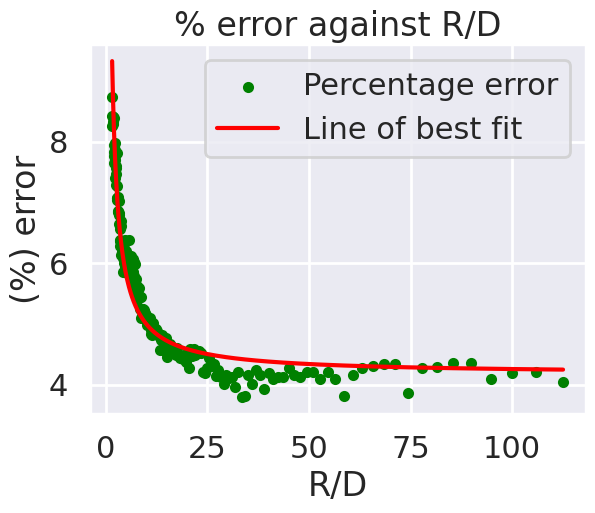

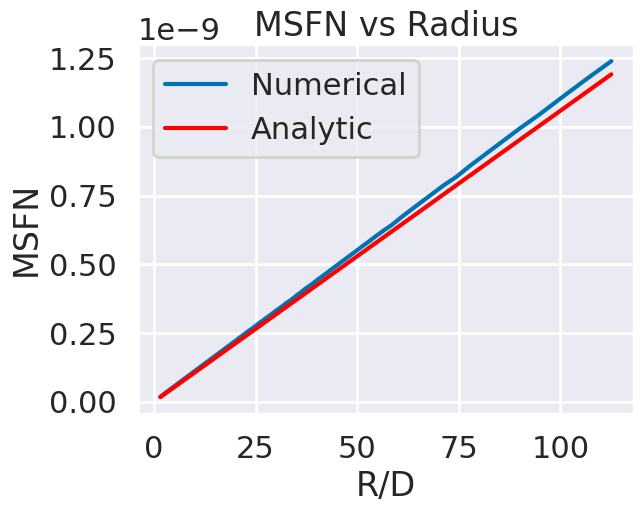

Max surface area error
0.5129655576833129
Min surface area error
0.003741022454842108


In [19]:
import os
import seaborn as sns
sns.set_theme("poster")
sns.set_palette("colorblind")

simRange = range(1,201)
df = pd.DataFrame()

for i in simRange:
    temp = pd.read_csv(f"./sim{i}/resPARR_SIM.csv")
    df = pd.concat([df,temp],ignore_index=True)

df["R/D"] = df["R"]/df["D"]
df["error"] = abs(df["Analytic"] - df["Numerical"])
df["error%"] = df["error"]/df["Analytic"] * 100
df[" Numerical Area"] = df[" Numerical Area"]*1e-12
df["Area Error"] = abs(df[" Numerical Area"] - df["Analytic Area"])
df["%AreaError"] = df["Area Error"]/df["Analytic Area"] * 100


plt.scatter(df["R/D"],df["error%"],marker='.',color='green')
plt.title("% error against R/D")
plt.ylabel("(%) error")
plt.xlabel("R/D")

# best fit line 
m,c = np.polyfit(1/df["R/D"],df["error%"],1)
lineY = m*1/df["R/D"] + c
plt.plot(df["R/D"],lineY,color="red")

plt.legend(["Percentage error","Line of best fit"])
plt.show()



fig, ax = plt.subplots()

ax.plot(df["R/D"],df["Numerical"],label="Inline label")
ax.plot(df["R/D"],df["Analytic"],color='red')
ax.legend(['Numerical', 'Analytic'])
plt.title("MSFN vs Radius")
plt.ylabel('MSFN')
plt.xlabel("R/D")


plt.show()

# fig, ax1 = plt.subplots(layout='constrained')
# ax1.scatter(df['R/D'],df['error%'],marker='.')
# plt.show()

# plt.scatter(df["R/D"],df["%AreaError"],marker=".",color="green")

# plt.show()
print("Max surface area error")
print(np.max(df["%AreaError"]))
print("Min surface area error")
print(np.min(df["%AreaError"]))

,R,D,Analytic,Numerical,Analytic Area,Numerical Area,R/D,error,error%,Area Error,%AreaError
0,0.000008,5.000000e-06,1.694035e-11,1.842060e-11,7.895684e-10,7.913440e-10,1.600000,1.480253e-12,8.738032,1.775648e-12,0.224888
1,0.000008,4.976884e-06,1.741457e-11,1.885190e-11,8.041838e-10,8.054800e-10,1.644790,1.437329e-12,8.253601,1.296229e-12,0.161186
2,0.000008,4.953769e-06,1.789322e-11,1.939950e-11,8.186295e-10,8.194770e-10,1.689998,1.506280e-12,8.418160,8.474842e-13,0.103525
3,0.000009,4.930653e-06,1.837636e-11,1.990530e-11,8.329056e-10,8.350000e-10,1.735630,1.528943e-12,8.320161,2.094412e-12,0.251459
4,0.000009,4.907538e-06,1.886405e-11,2.044940e-11,8.470120e-10,8.503370e-10,1.781692,1.585354e-12,8.404103,3.325013e-12,0.392558
...,...,...,...,...,...,...,...,...,...,...,...
195,0.000044,4.924623e-07,9.514900e-10,9.929460e-10,4.302072e-10,4.307110e-10,89.867347,4.145597e-11,4.356953,5.038141e-13,0.117110
196,0.000044,4.693467e-07,1.002546e-09,1.043500e-09,4.117363e-10,4.113270e-10,94.689507,4.095430e-11,4.085031,4.093388e-13,0.099418
197,0.000045,4.462312e-07,1.058891e-09,1.103270e-09,3.930958e-10,3.929950e-10,100.011261,4.437908e-11,4.191091,1.008185e-13,0.025647
198,0.000045,4.231156e-07,1.121393e-09,1.168530e-09,3.742856e-10,3.742360e-10,105.914489,4.713737e-11,4.203467,4.962504e-14,0.013259


In [4]:
res

,R,D,Analytic,Numerical,R/D,error,error%,D/R
0,0.000015,1.800000e-07,8.823097e-10,9.204460e-10,83.333333,3.813626e-11,4.322321,0.012000
1,0.000015,2.772414e-07,5.728429e-10,5.956120e-10,54.104478,2.276911e-11,3.974756,0.018483
2,0.000015,3.744828e-07,4.240936e-10,4.415520e-10,40.055249,1.745837e-11,4.116630,0.024966
3,0.000015,4.717241e-07,3.366708e-10,3.498570e-10,31.798246,1.318618e-11,3.916638,0.031448
4,0.000015,5.689655e-07,2.791307e-10,2.906560e-10,26.363636,1.152528e-11,4.128991,0.037931
5,0.000015,6.662069e-07,2.383880e-10,2.482330e-10,22.515528,9.844964e-12,4.129806,0.044414
6,0.000015,7.634483e-07,2.080242e-10,2.173780e-10,19.647696,9.353752e-12,4.496472,0.050897
7,0.000015,8.606897e-07,1.845215e-10,1.923880e-10,17.427885,7.866491e-12,4.263184,0.057379
8,0.000015,9.579310e-07,1.657904e-10,1.731530e-10,15.658747,7.362616e-12,4.440919,0.063862
9,0.000015,1.055172e-06,1.505117e-10,1.571420e-10,14.215686,6.630338e-12,4.405199,0.070345
